Epoch 1/5
4/4 [==============================] - 41310s 12882s/step - loss: 0.6921 - accuracy: 0.5234 - val_loss: 0.6887 - val_accuracy: 0.5938
Epoch 2/5
4/4 [==============================] - 13976s 3590s/step - loss: 0.6857 - accuracy: 0.6094 - val_loss: 0.6806 - val_accuracy: 0.5938
Epoch 3/5
4/4 [==============================] - 15794s 4022s/step - loss: 0.6758 - accuracy: 0.6094 - val_loss: 0.6748 - val_accuracy: 0.5938
Epoch 4/5
4/4 [==============================] - 17053s 4291s/step - loss: 0.6667 - accuracy: 0.6094 - val_loss: 0.6755 - val_accuracy: 0.5938
Epoch 5/5
2/2 [==============================] - 181s 24s/step


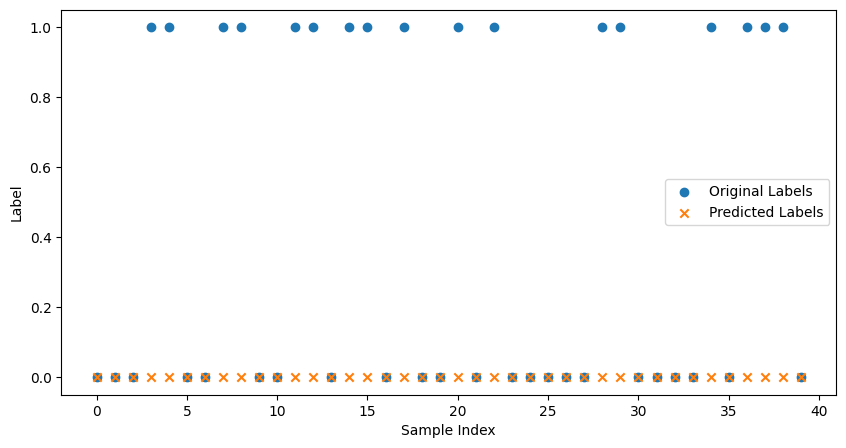

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
import librosa
from keras import layers

# Step 1: Generate Data
# ... (Assuming you have 200 WAV files generated as described)

# Step 2: Preprocess Data
def load_and_preprocess_wav(file_path, duration=4, sr=22050):
    audio, _ = librosa.load(file_path, sr=sr)
    target_length = int(sr * duration)
    if len(audio) > target_length:
        audio = audio[:target_length]
    else:
        audio = np.pad(audio, (0, target_length - len(audio)), 'constant')
    return audio

def preprocess_wav_files(input_dir, duration=4, sr=22050):
    data = []
    labels = []

    for file_name in os.listdir(input_dir):
        if file_name.endswith(".wav"):
            file_path = os.path.join(input_dir, file_name)

            # Load and preprocess the audio file
            preprocessed_audio = load_and_preprocess_wav(file_path, duration=duration, sr=sr)

            # Label data based on whether it contains the target signal or not
            label = 1 if "target" in file_name else 0
            data.append(preprocessed_audio)
            labels.append(label)

    return np.array(data), np.array(labels)

input_directory = "C:/Users/nimej/Downloads/audios/"
data, labels = preprocess_wav_files(input_directory)

# Step 3: Build RNN Model
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.LSTM(64, input_shape=(None, 1), return_sequences=True),
    layers.LSTM(32, return_sequences=True),
    layers.LSTM(16),
    layers.Dense(1, activation='sigmoid')  # Output layer with a sigmoid activation for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Step 4: Visualization
# Assuming the last layer of your model is a dense layer with a sigmoid activation
predictions = model.predict(X_test)
predicted_labels = (predictions > 0.5).astype(int)

# Plot the original labels and predicted labels
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label='Original Labels')
plt.scatter(range(len(predicted_labels)), predicted_labels, label='Predicted Labels', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.show()
